# helloNet - Preprocess Data

Demo Script: Explains how to preprocess the data

## 1- Import Required Modules

Importing preprocessing module of helloNet

In [1]:
from helloNet.preprocessing import flatten_data, normalize_data, normalize_image_data, standardize_data
from helloNet.datasets import load_image_classification_dataset
import numpy as np
import matplotlib.pyplot as plt

## 2- Load a Dataset

To explain preprocessig functions, we can use built-in datasets from helloNet

In [2]:
dataset = load_image_classification_dataset("cats_and_dogs_mini")

Imported: train_cats_and_dogs_mini.h5
Imported: classes_cats_and_dogs_mini.h5
Imported: val_cats_and_dogs_mini.h5
Imported: test_cats_and_dogs_mini.h5

Class names: [b'cat' b'dog'] and Shape: (2,)
Train Set - Size: 2250	- Shapes: X_train:	(2250, 128, 128, 3),	Labels (Y_train): (1, 2250)
Val Set - Size: 450	- Shapes: X_val:	(450, 128, 128, 3),	Labels (Y_val): (1, 450)
Test Set - Size: 300	- Shapes: X_test:	(300, 128, 128, 3),	Labels (Y_test): (1, 300)

Returned: X_train, Y_train, classes, X_val, Y_val, X_test, Y_test in a dictionary


### 2.1- Unpack Dataset

Unpacking dataset dictionary to get train, val and test sets.

In [11]:
x_train = dataset["X_train"]
y_train = dataset["Y_train"]
x_val = dataset["X_val"]
y_val = dataset["Y_val"]
x_test = dataset["X_test"]
y_test = dataset["Y_test"]

## 3- Preprocess Data

### 3.1- Flatten Data

In order to use preprocessing functions, we need to get flattened version of the data

In [4]:
x_train_flatten = flatten_data(x_train)

Flattened data - new shape: (49152, 2250)


### 3.2- Normalize Data (Standard Normalization)

Apply "normalize" transformation to selected dataset

In [5]:
x_train_normalized = normalize_data(x_train_flatten)

Normalized data - min: 0.00 - max: 1.00


So, how does our dataset looks like after transformation? The Answer:

In [6]:
x_train_normalized[:10]

array([[0.36862745, 0.25490196, 0.38431373, ..., 0.94117647, 0.03921569,
        0.52156863],
       [0.31372549, 0.29019608, 0.34117647, ..., 0.91764706, 0.03529412,
        0.51764706],
       [0.11372549, 0.30980392, 0.33333333, ..., 0.96470588, 0.02745098,
        0.48627451],
       ...,
       [0.36862745, 0.30588235, 0.1372549 , ..., 0.91372549, 0.03529412,
        0.60784314],
       [0.15686275, 0.34117647, 0.09019608, ..., 0.96078431, 0.02745098,
        0.58039216],
       [0.43137255, 0.29411765, 0.09411765, ..., 0.94117647, 0.04313725,
        0.65882353]])

Let's rescale and display a sample image if everythings is correct. 

matplotlib.imshow method automatically rescales to 0-255 range if it comes with (h,w,3) format

Text(0.5, 1.0, 'Normalized (and scaled back)')

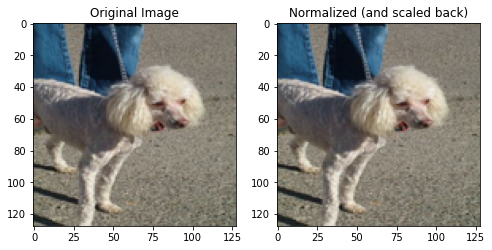

In [7]:
# Generate a random index
rand_index_norm = np.random.randint(x_train.shape[1])

# Reshape normalized data as image
test_image_norm = x_train_normalized[:,rand_index_norm].reshape(128,128,3)

# Create subplots object
fig, ax = plt.subplots(1,2,figsize=(8,6))

# Show original image
ax[0].imshow(x_train[rand_index_norm])
ax[0].set_title("Original Image")

# Show image from normalization process (scaled to 0-255)
ax[1].imshow(test_image_norm)
ax[1].set_title("Normalized (and scaled back)")


### 3.3- Standardize Data

Apply "standardize" transformation to selected dataset

In [8]:
x_train_standardized = standardize_data(x_train_flatten)

Standardized data - mean: (-0.0000 - min: -2.1141 - max: 2.5830


Let's take a look at transformed data:

In [9]:
x_train_standardized[:10]

array([[-0.30741894, -0.71911538, -0.25063322, ...,  1.7652597 ,
        -1.49991897,  0.24624179],
       [-0.44908441, -0.53478997, -0.3490946 , ...,  1.75069151,
        -1.46326682,  0.29369707],
       [-1.04250526, -0.34263271, -0.25864801, ...,  1.99494158,
        -1.35044917,  0.28725258],
       ...,
       [-0.24569035, -0.47474853, -1.0903424 , ...,  1.7442526 ,
        -1.46256194,  0.62759397],
       [-0.8821407 , -0.2238221 , -1.12025594, ...,  1.98924895,
        -1.3443644 ,  0.63059141],
       [-0.0810988 , -0.58063189, -1.30852295, ...,  1.7743098 ,
        -1.49406381,  0.74669889]])

Comparing the same sample before and after of dateset 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Standardized (and scaled back)')

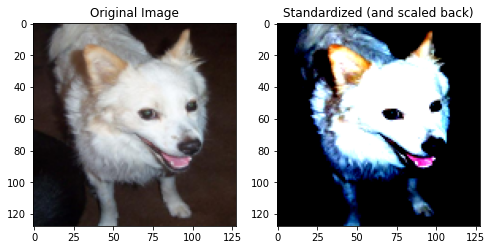

In [10]:
# Generate a random index
rand_index_stand = np.random.randint(x_train.shape[1])

# Reshape standardized data as image
test_image_stand = x_train_standardized[:,rand_index_stand].reshape(128,128,3)

# Create subplots object
fig, ax2 = plt.subplots(1,2,figsize=(8,6))

# Show original image
ax2[0].imshow(x_train[rand_index_stand])
ax2[0].set_title("Original Image")

# Show image from normalization process (scaled to 0-255)
ax2[1].imshow(test_image_stand)
ax2[1].set_title("Standardized (and scaled back)")